## Sentiment Reddit 
Felix Funes 20220306 | Paula Catalan 20221048 | Efstathia Styliagkatzi 20220078 | Alisson Tapia 20221156 | S M Abrar Hossain Asif 20220223

Sentiment analysis, also known as opinion mining, is a subfield of natural language processing (NLP) that involves the use of computational techniques to determine the sentiment or subjective information expressed in text. It aims to automatically identify and extract the emotional tone, attitude, or opinion present in a piece of text, such as reviews, social media posts, customer feedback, and more.

The goal of sentiment analysis is to classify the text into different categories or sentiment polarities, typically being positive, negative, or neutral. This analysis helps businesses and organizations gain insights into public opinion, customer feedback, brand perception, and market trends. By understanding the sentiment expressed in large volumes of text data, companies can make data-driven decisions, improve their products or services, and enhance customer experiences.

There are various approaches to sentiment analysis, ranging from rule-based methods to machine learning techniques. Rule-based methods involve defining a set of rules or patterns to identify sentiment-bearing words or phrases and assign sentiment scores accordingly. On the other hand, machine learning approaches utilize algorithms to automatically learn patterns and relationships from labeled training data, enabling the system to classify new, unseen text.

Sentiment analysis faces several challenges, including sarcasm, irony, context ambiguity, and language nuances. Interpreting sentiment accurately becomes more complex when dealing with these linguistic subtleties. Researchers and developers continuously strive to improve the performance of sentiment analysis models by leveraging advanced techniques such as deep learning, contextual word embeddings, and domain-specific training data.

The applications of sentiment analysis are diverse and span across various industries. Some common use cases include brand monitoring, reputation management, customer feedback analysis, social media sentiment tracking, market research, political analysis, and customer support optimization.

In summary, sentiment analysis is a valuable tool that allows businesses and organizations to gain insights from text data by automatically classifying the sentiment expressed within it. It has become increasingly important in today's digital age, where massive amounts of textual information are generated daily, and understanding the sentiment behind that information can provide a competitive advantage.

In [4]:
# Import packages
import csv
import pandas as pd
import numpy as np
import nltk 
import re
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [5]:
# Load dataset
dtypes = {'Id':'category','type':'category','subreddit':'category','score':'float64','title':'category','reviews':'category','author':'category'}
ds= pd.read_excel("reddit_FINAL_v12.xlsx", sheet_name="Sheet1", engine='openpyxl', dtype=dtypes)


In [6]:
# Check first rows
ds.head()

,Id,type,subreddit,title,reviews,author,date_published,score
0,1,post,iphone,Iphone 14 leather cases like andar brand but i...,Are there any? I don't wanna wait a month to r...,New-Analysis8054,2023-04-29 07:22:04,1.0
1,2,comment,iphone,Iphone 14 leather cases like andar brand but i...,Mujjo and Solo Pelle both make great leather c...,ShortOnCoffee,2023-04-29 07:52:29,1.0
2,3,comment,iphone,Iphone 14 leather cases like andar brand but i...,I use Mujjo. Another brand is Decoded.,uwGrootsheid,2023-04-29 10:29:29,1.0
3,4,post,iphone,Why is my screen time incorrect?,Barely used my phone today but it shows 3 hours.,tyler_ness,2023-04-28 21:07:35,1.0
4,5,comment,iphone,Why is my screen time incorrect?,It shows your usage from your other devices li...,lovekorra,2023-04-29 05:45:35,1.0


In [7]:
# Text preprocessing
def textPreProcess(rawText, removeHTML=True, charsToRemove = r'\?|\.|\!|\;|\.|\"|\,|\(|\)|\&|\:|\-', removeNumbers=True, removeLineBreaks=False, specialCharsToRemove = r'[^\x00-\xfd]', convertToLower=True, removeConsecutiveSpaces=True):
    if type(rawText) != str:
        return rawText
    procText = rawText
        
    # Remove HTML
    if removeHTML:
        procText = BeautifulSoup(procText,'html.parser').get_text()

    # Remove punctuation and other special characters
    if len(charsToRemove)>0:
        procText = re.sub(charsToRemove,' ',procText)

    # Remove numbers
    if removeNumbers:
        procText = re.sub(r'\d+',' ',procText)

    # Remove line breaks
    if removeLineBreaks:
        procText = procText.replace('\n',' ').replace('\r', '')

    # Remove special characters
    if len(specialCharsToRemove)>0:
        procText = re.sub(specialCharsToRemove,' ',procText)

    # Normalize to lower case
    if convertToLower:
        procText = procText.lower() 

    # Replace multiple consecutive spaces with just one space
    if removeConsecutiveSpaces:
        procText = re.sub(' +', ' ', procText)

    return procText

In [8]:
# Tokenize words
def tokenize_words(words):
    if (type(words) != str) or (word_tokenize(words) == ''):
        return np.nan
    else:
        return word_tokenize(words)

In [9]:
# Function to create text from words
def recreateText(words):
    if type(words) == list:
        temp_str = (' ').join(words)
        return temp_str
    else:
        return np.nan

In [10]:
# Function to break texts into sentences
def tokenize_sentences(texts):
    s_token = sent_tokenize(texts)
    return s_token

In [11]:
# Function to remove stop words
def removeStopWords(t, stop_words):
    if type(t) == list:
        return [w for w in t if not w in stop_words]
    else:
        return np.nan

In [12]:
## Analysis

In [13]:
def tokenize_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return ". ".join(sentences)

In [14]:
# Because a review can express multiple opinions, let's analyze opinions by sentence

# Break reviews' into a list of lists sentences
listOfSentences = ds.reviews.apply(tokenize_sentences)

In [15]:
# Create a dataframe with only the description
processedReviews = pd.DataFrame(data=ds.reviews.apply(textPreProcess,charsToRemove ='', removeLineBreaks=False, removeNumbers=False).values, index=ds.index, columns=['PreProcessedText'])

C:\Users\asifa\anaconda3\lib\site-packages\bs4\__init__.py:431: MarkupResemblesLocatorWarning: "https://iaohi.com/products/aohi-magcube-65w-pd-fast-charger" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\asifa\anaconda3\lib\site-packages\bs4\__init__.py:431: MarkupResemblesLocatorWarning: "https://preview.redd.it/yqvdvjj1r8wa1.jpeg?width=640&format=pjpg&auto=webp&v=enabled&s=10f145dc1c4c69eb3b08c6716b4ab2676564fe19" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [16]:
# Check first review
ds.reviews[0]

"Are there any? I don't wanna wait a month to receive it, i live in italy if that matters"

In [17]:
listOfSentences[0]

"Are there any?. I don't wanna wait a month to receive it, i live in italy if that matters"

In [18]:
# Split sentences and count the number of sentences per review
reviews_str = ds['reviews'].astype(str)
sentences = pd.DataFrame(reviews_str.str.split('.').tolist(), index=ds['Id']).stack()
sentencesPerReview = [len(elem) for elem in reviews_str.str.split('.')]
 
# Create a new DataFrame with the sentences and their respective IDs
sentences.name = 'sentence'
sentences.index.names = ['Id', 'sentence_no']
sentences = sentences.reset_index().set_index('Id')











In [19]:
import re
import string

def text_preprocess(text):
    """
    Preprocess text data by converting to lowercase, removing punctuation and digits, and removing extra whitespaces.
    """
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Preprocess text 
sentences['PreProcessedText'] = sentences['sentence'].apply(text_preprocess)


In [20]:
# Get words
sentences['Words'] =  sentences['PreProcessedText'].apply(tokenize_words)



In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asifa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
sentences['WordsCleaned'] = sentences['Words'].apply(removeStopWords,stop_words=stop_words)

In [23]:
# Recreate sentence without stopwords
sentences['ProcessedText'] = sentences['WordsCleaned'].apply(recreateText)


In [24]:
# Create sentiment analysis object
analyser = SentimentIntensityAnalyzer()

In [25]:
# To test, let's evaluate first sentence of first review
# Scales:
#   compound: -1:most extreme negative, 1:most extreme positive
#     positive: compound >=0.05
#     neutral: -0.05<compound<0.05
#     negative: compound <= -0.05
#   pos, neu, neg: proportion of text that are positive, neutral or negative
score = analyser.polarity_scores(sentences['ProcessedText'][0])
print(sentences['ProcessedText'][0],score)

dont wan na wait month receive live italy matters {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.0258}


In [26]:
# Process sentiment for all sentences
all_scores = []
for t in (sentences['ProcessedText'][:]):
  score = analyser.polarity_scores(t)
  all_scores.append(score)
sentences['Sentiment'] = [c['compound'] for c in all_scores]

In [27]:
# Compute review's sentiment as the mean sentiment from its sentences
meanByReview = sentences.groupby('Id')['Sentiment'].mean()

# Consider sentences with no result as neutral (0)
meanByReview = meanByReview.fillna(0)

# Add column Sentiment to reviews Dataframe
ds['Sentiment'] = meanByReview[ds['Id']].values

In [28]:
bins = pd.IntervalIndex.from_tuples([(-1.1, -0.05), (-0.05, 0.05), (0.05, 1)], closed='right')
x = pd.cut(ds['Sentiment'].to_list(), bins)
x = x.set_categories(['Negative','Neutral','Positive'])
ds['Polarity'] = x

In [47]:
import pandas as pd

# Define the interval bins and categories
bins = pd.IntervalIndex.from_tuples([(-1.1, -0.05), (-0.05, 0.05), (0.05, 1)], closed='right')
categories = ['Negative', 'Neutral', 'Positive']

# Bin the 'Sentiment' column into the specified categories
ds['Polarity'] = pd.cut(ds['Sentiment'], bins=len(categories), labels=categories,right=False)

# Print the 'Polarity' column
print(ds['Polarity'])


0       Neutral
1      Positive
2       Neutral
3       Neutral
4       Neutral
         ...   
777    Negative
778     Neutral
779     Neutral
780     Neutral
781     Neutral
Name: Polarity, Length: 782, dtype: category
Categories (3, object): ['Negative' < 'Neutral' < 'Positive']


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the categories
categories = ['Negative', 'Neutral', 'Positive']

# Bin the 'Sentiment' column into the specified categories
ds['Polarity'] = pd.cut(ds['Sentiment'], bins=len(categories), labels=categories, right=False)

# Calculate the polarity counts
polarity_counts = ds['Polarity'].value_counts()



In [45]:
polarity_counts

Neutral     605
Negative    104
Positive     73
Name: Polarity, dtype: int64

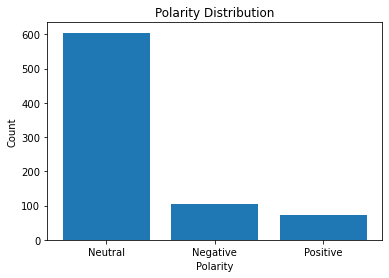

In [46]:
# Plot a bar chart of polarity counts
plt.bar(polarity_counts.index, polarity_counts.values)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')
plt.show()

This distribution of polarity categories provides an overview of the sentiment expressed in the reviews. It indicates that the majority of the reviews fall under the "Neutral" category, while a smaller number of reviews are classified as either "Negative" or "Positive". This distribution suggests a relatively balanced sentiment among the reviewers, with a slight inclination towards neutrality.

In [48]:
# Analysis examples:
# By title
ex1 = ds.groupby('title')['Sentiment'].mean().to_frame()
ex1

,Sentiment
title,
Apple 20w charger or Anker 20w Nano,0.129564
Apple care,0.000000
"Applecare+, is it worth it?",0.034008
BEST CASE FOR IPHONE 14,0.206869
Black Bar at Top,0.133020
...,...
iPhone not turning on,0.203391
"my iphone 14 camera automatically edits my photos, i cant figure out how to stop it",0.044548
phone getting really hot,0.002800


These sentiment scores represent the sentiment expressed in the corresponding titles. Positive sentiment scores indicate positive sentiment, while negative sentiment scores indicate negative sentiment. A sentiment score of 0 suggests a neutral sentiment.

These scores can be used to gauge the overall sentiment associated with each title. Titles with higher positive sentiment scores generally indicate positive experiences or opinions, while titles with negative sentiment scores may indicate negative experiences or issues. Titles with scores close to 0 suggest a neutral sentiment or mixed opinions.

It's important to note that the sentiment scores are numerical representations of sentiment and should be interpreted in the context of the specific analysis or application.

In [49]:
# Analysis examples:
# By Comment type and score
ex2 = ds[['author','Sentiment','reviews']].groupby(['reviews'], as_index=False).mean()
ex2

,reviews,Sentiment
0,"\nHello guys, I bought my IPhone 14 yesterday,...",0.137667
1,\nSorry for your loss. \n\nIs it a normal 4 or...,0.047525
2,Apple unless ya don’t mind fires on ur bedroo...,0.000000
3,Why not ? I saw that the size is really similar,0.000000
4,"""In 2016, the Samsung Gear S2 Classic 3G smart...",0.133967
...,...,...
762,you know that could be done with physical sims...,0.000000
763,☝️ Yup. They have machine learning models of w...,0.126225
764,👍,0.000000
765,😭fair enough,0.318200


The sentiment scores represent the sentiment expressed in each review. Positive sentiment scores indicate positive sentiment, negative scores indicate negative sentiment, and a score of 0 suggests a neutral sentiment.

These scores can be used to analyze the sentiment of the reviews. Higher positive sentiment scores indicate more positive opinions or experiences expressed in the review, while negative sentiment scores may indicate negative experiences or issues. Reviews with scores close to 0 suggest a neutral sentiment or mixed opinions.

It's important to note that the sentiment scores are numerical representations of sentiment and should be interpreted in the context of the specific analysis or application.

In [50]:
# Analysis examples:
# By title and polarity
ex3 = ds.groupby(['title', 'Polarity'])['Sentiment'].mean().to_frame()
ex3


Sentiment
title                                              Polarity           
Apple 20w charger or Anker 20w Nano                Negative  -0.251434
                                                   Neutral    0.082653
                                                   Positive   0.551665
Apple care                                         Negative        NaN
                                                   Neutral    0.000000
...                                                                ...
weird group chat text issue                        Neutral    0.200754
                                                   Positive        NaN
what tf is this and why is it happening??!! (ip... Negative  -0.340000
                                                   Neutral    0.091092
                                                   Positive        NaN

[222 rows x 1 columns]

The sentiment scores for each polarity category (negative, neutral, positive) represent the sentiment expressed in the respective titles. Negative scores indicate negative sentiment, positive scores indicate positive sentiment, and NaN values indicate missing sentiment data.

These scores can be used to analyze the sentiment distribution across different titles and polarities. It appears that some titles have sentiment scores for multiple polarities, while others have scores for only one or two polarities.

It's important to consider that the interpretation of sentiment scores depends on the specific sentiment analysis method used and the context of the data. The absence of sentiment scores (NaN values) for certain polarities may indicate a lack of sentiment information or missing data for those categories.

In [52]:
# Analysis examples:
# By reviews and polarity
# Calculate the mean sentiment polarity for each combination of reviews and polarity
ex4 = ds.groupby(['reviews', 'Polarity'], as_index=False)['Sentiment'].mean()

# Print the result
print(ex4)



                                                reviews  Polarity  Sentiment
0     \nHello guys, I bought my IPhone 14 yesterday,...  Negative        NaN
1     \nHello guys, I bought my IPhone 14 yesterday,...   Neutral   0.137667
2     \nHello guys, I bought my IPhone 14 yesterday,...  Positive        NaN
3     \nSorry for your loss. \n\nIs it a normal 4 or...  Negative        NaN
4     \nSorry for your loss. \n\nIs it a normal 4 or...   Neutral   0.047525
...                                                 ...       ...        ...
2296                                       😭fair enough   Neutral   0.318200
2297                                       😭fair enough  Positive        NaN
2298                                                  🦦  Negative        NaN
2299                                                  🦦   Neutral   0.000000
2300                                                  🦦  Positive        NaN

[2301 rows x 3 columns]


The sentiment scores indicate the sentiment expressed in each review, with higher scores indicating more positive sentiment. However, it's important to note that the sentiment scores might have been generated using a specific sentiment analysis method, and the interpretation of the scores may vary.

The data can be further analyzed to examine the sentiment distribution across different polarities and to gain insights into the overall sentiment expressed in the reviews.

Conclusion

Based on the provided data, which includes reviews, polarity, and sentiment scores, we can draw the following overall conclusions:

Polarity Distribution: The majority of the reviews fall under the "Neutral" category (605 reviews), followed by "Negative" (104 reviews) and "Positive" (73 reviews) polarities. This indicates that a significant number of reviews expressed a neutral sentiment.

Sentiment Scores: The sentiment scores assigned to the reviews range from negative values to positive values. However, it's worth noting that there are missing sentiment scores (NaN values) for some reviews. The sentiment scores indicate the sentiment expressed in each review, with higher scores indicating more positive sentiment.

Analysis of Individual Reviews: Individual reviews exhibit a range of sentiments, with some expressing negative opinions, some expressing positive opinions, and others being more neutral. The sentiment scores can provide further insights into the sentiment intensity of each review.

Interpretation of Sentiment: It's important to consider the methodology used to generate the sentiment scores and the context of the reviews. The sentiment scores might have been calculated using a specific sentiment analysis technique, which may have limitations in accurately capturing the nuanced sentiment expressed in the text. Therefore, interpreting the sentiment scores should be done with caution.

Overall, the data suggests a mix of sentiments expressed in the reviews, with a notable number of reviews falling under the neutral polarity. Further analysis and exploration of the reviews and sentiment scores can provide more detailed insights into the sentiments of the reviewers towards the subject of the reviews (e.g., Apple products, specific topics, etc.).